#Práctico 2.a - Preprocesamiento de datos

Práctico 2 - Preprocesamiento


Parte a Preprocesamiento de datos

Dado el siguiente dataset de OpenML determine qué problemas presenta y qué tareas de preprocesamiento pueden ser aplicadas:

Dataset # 43347 (Penguins)
Cree un nuevo cuaderno en Google Collaboratory para estudiar el dataset y realice sobre el mismo las tareas de preprocesamiento requeridas. Para esto se deberá:

Cargar el dataset.
Realizar un análisis exploratorio de los datos.
Aplicar al menos 3 tareas de pre-procesamiento que crea necesarias (datos faltantes, discretización de valores, one hot encoder, corrección de escala, reducción de datos, etc.).
No solo se debe incluir en el cuaderno el código, sino además una breve explicación que justifique las decisiones tomadas.

# Acceso a conjunto de datos

In [ ]:
! pip install ydata-profiling

In [ ]:
!pip install openml
import openml

# **Descargar el dataset de pingüinos**

In [ ]:
# https://www.openml.org/d/43347
dataset = openml.datasets.get_dataset(43347)

print(f"This is dataset '{dataset.name}', the target feature is "
      f"'{dataset.default_target_attribute}'")
print(f"URL: {dataset.url}")
print(dataset.description[:500])

This is dataset 'Palmer-Penguins-Dataset-Alternative-Iris-Dataset', the target feature is 'None'
URL: https://api.openml.org/data/v1/download/22102172/Palmer-Penguins-Dataset-Alternative-Iris-Dataset.arff
Palmer Penguins Dataset
The goal of palmerpenguins is to provide a great dataset for data exploration  visualization, as an alternative to iris.
About the data
Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.


**Obtener datos del dataset**

In [ ]:
X, y, categorical_indicator, attribute_names = dataset.get_data(
    dataset_format='dataframe',
    target=dataset.default_target_attribute
) # en este caso no hay atributo objetivo por default, pero si se quisiera hacer un entrenamiento supervisado por ejemplo a partir de la especie, se podría pasar "species" como target



In [ ]:
attribute_names

['species',
 'island',
 'bill_length_mm',
 'bill_depth_mm',
 'flipper_length_mm',
 'body_mass_g',
 'sex']

In [ ]:
X

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,None
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male


In [ ]:
y # al no imprimir nada, está claro que se el dataset está pensado para un entrenamiento no supervisado ya que no cuenta con un atributo objetivo por defecto

In [ ]:
import pandas as pd

combined_data = pd.concat([X, y], axis=1)
combined_data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,None
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male


# Análisis exploratorio de datos

In [ ]:
combined_data.describe() # se obtiene un reporte descriptivo de los datos con algunas estadísticas

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


**Visualizar el conjunto de datos**

Se obtienen una serie de gráficos que indican las distribuciones de los datos (sin basarse en alguna feature en sí ya que en este caso no se trabaja sobre alguna clase), para así poder sacar conclusiones.

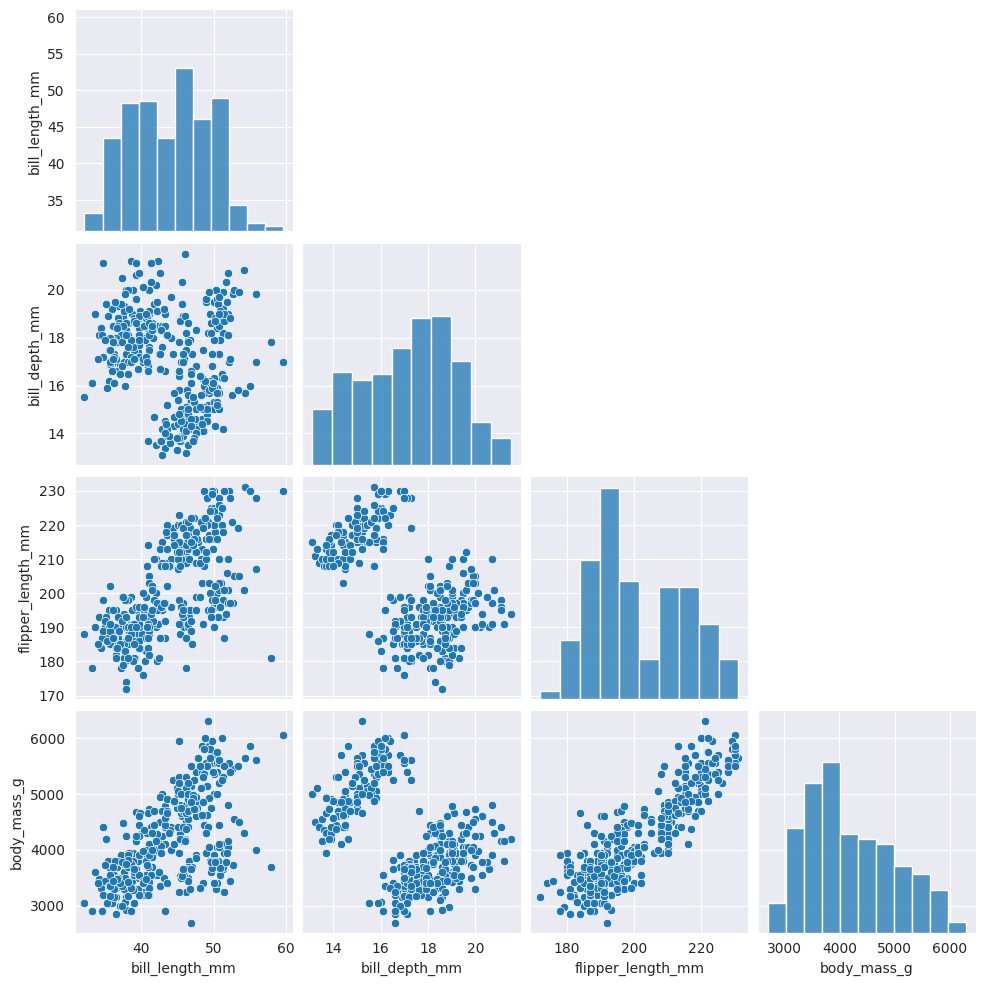

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")

def hide_current_axis(*args, **kwds):
    plt.gca().set_visible(False)

iris_plot = sns.pairplot(combined_data) # en este caso puntual no interesa ver la distribución de cada feature respecto a una en particular (si se quisiera se podría colocar como hue "species" para ver qué ocurre respecto a esa variable)
iris_plot.map_upper(hide_current_axis)
plt.show()

**Informe del conjunto de datos**

Se lleva a cabo un análisis de los datos mediante un YData Profiling Report, pudiendo ver que hay ciertas entradas del dataset con valores faltantes para las siguientes features:

-bill_length_mm: 2 faltantes

-bill_depth_mm: 2 faltantes

-flipper_length_mm: 2 faltantes

-body_mass_g: 2 faltantes

-sex: 11 faltantes

También se puede ver que hay una clara correlación positiva entre algunas features, por ejemplo entre el flipper_length_mm (longitud de la aleta en mm) y el body_mass_g (peso del cuerpo en gramos). Esto indica que, a medida que crece la longitud de la aleta del pinguino, su peso tiende a ser mayor. Esto mismo se confirma a través de los gráficos del análisis anterior, donde particularmente el gráfico que representa el body_mass_g en función del flipper_length_mm, evidencia que al pararse en un cierto peso en gramos para los pinguinos, se observará que en general la longitud de las aletas de aquellos que pesen eso o más tiende a ser mayor a la de los que pesan menos.

Por otra parte, se puede ver que el bill_depth_mm (profundidad del pico en mm) posee una correlación negativa con todas las otras variables cuantitativas, con menor medida respecto al bill_length_mm (longitud del pico en mm), de manera más notoria en cuanto al body_mass_g y finalmente más respecto al flipper_length_mm. Esto sin duda lleva a la conclusión de que a medida que el pico de los pinguinos es más profundo, suelen tener un pico con longitud más corta, menor peso y aletas con longitud más corta.

Además, se puede ver que claramente hay algunas features sin correlación entre sí, por ejemplo la isla y el sexo, donde es de 0. Esto indica que no influye en nada saber si un pinguino está en Biscoe, Dream o Torgensen para determinar qué tan probable es que sea macho o hembra.


In [ ]:
from ydata_profiling import ProfileReport

profile = ProfileReport(combined_data)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 7/7 [00:00<00:00, 46.62it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**Análisis específico de la correlación entre sexo y features numéricas**

Dado que el sexo era una de las variables que presentaba correlación positiva con todas las features cuantitativas (con algunas más que con otras), se procedió a hacer un análisis más puntual respecto a esta variable. Es evidente que en general los machos suelen tener una mayor longitud y profundidad de pico, así como tambén longitud de aletas y peso. Además, los valores más altos que sesgan ascendentemente estas variables, suelen estar asociados a los machos. Algo similar ocurre, aunque no tan bruscamente, respecto a los valores más bajos, que sesgan descendentemente, y en general están asociados a las hembras.

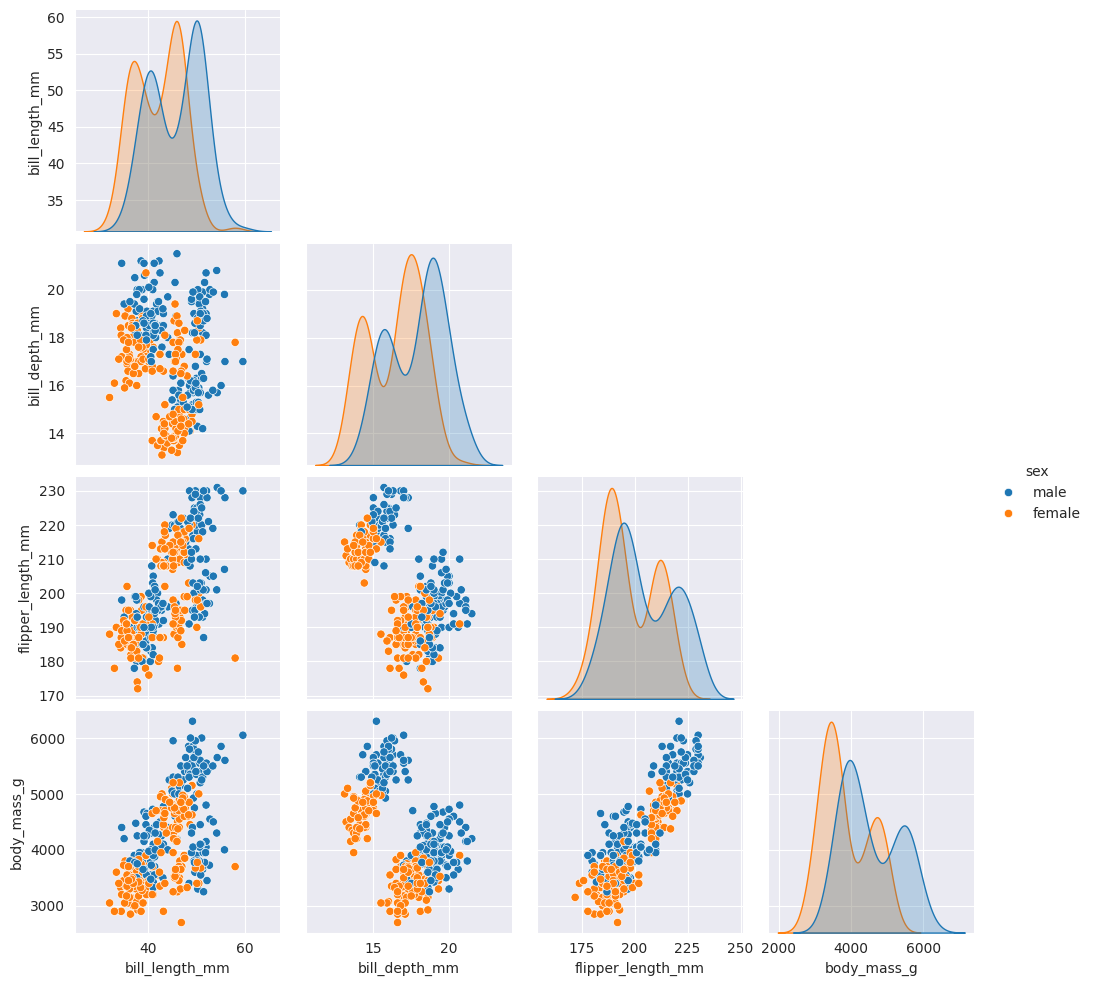

In [ ]:
iris_plot = sns.pairplot(combined_data, hue="sex") # se analiza puntualmente la distribución del sexo para las variables numéricas que presentan correlación positiva con esta
iris_plot.map_upper(hide_current_axis)
plt.show()

# Tareas de pre-procesamiento

**Tarea de tratamiento de valores faltantes para features cuantitativas**

Teniendo en cuenta lo analizado anteriormente, es necesario asignar algún valor a aquellas entradas del dataset con valores faltantes para las features que correspondan en cada caso. Primero que nada se procederá con las features cuantitavas, sobre las cuales teniendo en cuenta que se trata de valores numéricos y siendo que en este caso en general no hay sesgos muy altos y si se asume que el dataset es lo suficientemente representativo de la distribución real, entonces resulta sencillo y adecuado el uso de la media para completar los campos faltantes.

In [ ]:
dfdrop_numerical=combined_data.drop(['species', 'sex', 'island'],axis=1) # se quitan los atributos cualitativos sobre los cuales lógicamente no se puede aplicar una media
dfdrop_numerical.mean()

,0
bill_length_mm,43.921930
bill_depth_mm,17.151170
flipper_length_mm,200.915205
body_mass_g,4201.754386


In [ ]:
dfdrop_numerical=dfdrop_numerical.fillna(dfdrop_numerical.mean())
categorical_remainder_ft=combined_data[['species', 'island', 'sex']]
combined_data1 = pd.concat([dfdrop_numerical, categorical_remainder_ft], axis=1) # ahora se puede ver que por ejemplo la entrada 3 que tenía un NaN para la longitud de las aletas, ahora se completó con la media que es 200.915205

combined_data1

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species,island,sex
0,39.10000,18.70000,181.000000,3750.000000,Adelie,Torgersen,male
1,39.50000,17.40000,186.000000,3800.000000,Adelie,Torgersen,female
2,40.30000,18.00000,195.000000,3250.000000,Adelie,Torgersen,female
3,43.92193,17.15117,200.915205,4201.754386,Adelie,Torgersen,None
4,36.70000,19.30000,193.000000,3450.000000,Adelie,Torgersen,female
...,...,...,...,...,...,...,...
339,55.80000,19.80000,207.000000,4000.000000,Chinstrap,Dream,male
340,43.50000,18.10000,202.000000,3400.000000,Chinstrap,Dream,female
341,49.60000,18.20000,193.000000,3775.000000,Chinstrap,Dream,male
342,50.80000,19.00000,210.000000,4100.000000,Chinstrap,Dream,male


**Tarea de tratamiento de valores faltantes para features cualitativas**

Una vez que se cuenta con los campos faltantes para las variables cuantitativas completados, se procede a completar los campos cualitativos faltantes. Particularmente solo el sexo es un atributo cualitativo con valores faltantes.

In [ ]:
entries_with_missing_values_sex = combined_data1[combined_data1['sex'].isna()]
indexes_missing_values_sex = entries_with_missing_values_sex.index
print(entries_with_missing_values_sex)
print(indexes_missing_values_sex) # se muestran los 11 campos con valores faltantes

     bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g species  \
3          43.92193       17.15117         200.915205  4201.754386  Adelie   
8          34.10000       18.10000         193.000000  3475.000000  Adelie   
9          42.00000       20.20000         190.000000  4250.000000  Adelie   
10         37.80000       17.10000         186.000000  3300.000000  Adelie   
11         37.80000       17.30000         180.000000  3700.000000  Adelie   
47         37.50000       18.90000         179.000000  2975.000000  Adelie   
178        44.50000       14.30000         216.000000  4100.000000  Gentoo   
218        46.20000       14.40000         214.000000  4650.000000  Gentoo   
256        47.30000       13.80000         216.000000  4725.000000  Gentoo   
268        44.50000       15.70000         217.000000  4875.000000  Gentoo   
271        43.92193       17.15117         200.915205  4201.754386  Gentoo   

        island   sex  
3    Torgersen  None  
8    Torgersen  N

Se utiliza un algoritmo de RandomForestClassifier para predecir el sexo para aquellas entradas en las que falta, en base a todos los atributos cuantitativos con los cuales presenta una clara correlación positiva.

In [ ]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

features = ['bill_length_mm',  'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
target = 'sex'

df_train = combined_data1.dropna(subset=[target])

df_missing = combined_data1[combined_data1[target].isna()]

clf = RandomForestClassifier(random_state=42)
clf.fit(df_train[features], df_train[target])

predicted_sex = clf.predict(df_missing[features])

combined_data1.loc[combined_data1[target].isna(), target] = predicted_sex

Como se puede ver, en aquellas entradas con valores relativamente bajos para las variables numericas, se predijo sexo femenino, como por ejemplo en la 8. En cambio en aquellos con valores mas altos para esas features, como por ejemplo la 271, predijo masculino. Hay algunos casos puntuales como la 256 y la 268 que tienen valores altos par varias features, pero muy bajo para la profundidad del pico. Y es probable que por ello las clasificó como femeninas, dando importancia a los valores tan bajos que hubo para esa feature. De esta forma se completaron los valores faltantes. Esto se podría haber hecho sencillamente completando por la moda (el valor más frecuente), pero no tendría mucho sentido en este caso puesto que para los valores no faltantes tan solo había 3 entradas de diferencia entre la cantidad de pinguinos masculinos (168) y femeninos (165). Entonces, tratándose de un dataset donde 3 de diferencia es muy poco en términos porcentuales, no sería muy confiable usar la moda.

In [ ]:
combined_data1.loc[indexes_missing_values_sex]

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species,island,sex
3,43.92193,17.15117,200.915205,4201.754386,Adelie,Torgersen,male
8,34.10000,18.10000,193.000000,3475.000000,Adelie,Torgersen,female
9,42.00000,20.20000,190.000000,4250.000000,Adelie,Torgersen,male
10,37.80000,17.10000,186.000000,3300.000000,Adelie,Torgersen,female
11,37.80000,17.30000,180.000000,3700.000000,Adelie,Torgersen,female
47,37.50000,18.90000,179.000000,2975.000000,Adelie,Dream,female
178,44.50000,14.30000,216.000000,4100.000000,Gentoo,Biscoe,female
218,46.20000,14.40000,214.000000,4650.000000,Gentoo,Biscoe,female
256,47.30000,13.80000,216.000000,4725.000000,Gentoo,Biscoe,female
268,44.50000,15.70000,217.000000,4875.000000,Gentoo,Biscoe,female


**Tarea de normalización de features numéricas**

Para el caso de las features numéricas, una vez completados los valores faltantes, se lleva a cabo una normalización min-max que en general suele ser mejor para los algoritmos de entrenamiento. Esto es posible dado que se conocen los valores mínimos y máximos.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer

dfdrop_numerical=combined_data1.drop(['species', 'sex', 'island'],axis=1)
columnTransformer = ColumnTransformer([('num', MinMaxScaler(), [0,1,2,3])], remainder='passthrough')
dfdrop_numerical = pd.DataFrame(columnTransformer.fit_transform(dfdrop_numerical), columns=dfdrop_numerical.columns)
dfdrop_numerical

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,0.254545,0.666667,0.152542,0.291667
1,0.269091,0.511905,0.237288,0.305556
2,0.298182,0.583333,0.389831,0.152778
3,0.429888,0.482282,0.490088,0.417154
4,0.167273,0.738095,0.355932,0.208333
...,...,...,...,...
339,0.861818,0.797619,0.593220,0.361111
340,0.414545,0.595238,0.508475,0.194444
341,0.636364,0.607143,0.355932,0.298611
342,0.680000,0.702381,0.644068,0.388889


Ahora ya se cuenta con las features numéricas normalizadas entre 0 y 1.

In [ ]:
categorical_remainder_ft=combined_data1[['species', 'island', 'sex']]
combined_data2 = pd.concat([dfdrop_numerical, categorical_remainder_ft], axis=1)
combined_data2

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species,island,sex
0,0.254545,0.666667,0.152542,0.291667,Adelie,Torgersen,male
1,0.269091,0.511905,0.237288,0.305556,Adelie,Torgersen,female
2,0.298182,0.583333,0.389831,0.152778,Adelie,Torgersen,female
3,0.429888,0.482282,0.490088,0.417154,Adelie,Torgersen,male
4,0.167273,0.738095,0.355932,0.208333,Adelie,Torgersen,female
...,...,...,...,...,...,...,...
339,0.861818,0.797619,0.593220,0.361111,Chinstrap,Dream,male
340,0.414545,0.595238,0.508475,0.194444,Chinstrap,Dream,female
341,0.636364,0.607143,0.355932,0.298611,Chinstrap,Dream,male
342,0.680000,0.702381,0.644068,0.388889,Chinstrap,Dream,male


**Tarea de One Hot Enconding para atributos nominales**

Puesto que se cuenta con 3 atributos categóricos cualitativos como lo son la especie, isla y sexo de los pinguinos, los cuales no es posible representar a través de una escala numérica, es necesario aplicar la técnica de One Hot Encoding con el objetivo de llevarlos a números (sin confundir al algoritmo como si se tratara de alguna escala). Teniendo en cuenta que hay 4 columnas numéricas y 3 cualitativas inicialmente, y que de las cualitativas tanto la especie como la isla se dividen en 3 cada una, y el sexo en 2, entonces quedan 12 columnas tras aplicar el One Hot Encoding.

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_columns = ['species', 'island', 'sex']
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # en realidad no tiene mucho sentido el handle unknown en este caso ya que no van a aparecer nuevas columnas, pero lo dejo igual
columnTransformer = ColumnTransformer(
    transformers=[('encoder', encoder, categorical_columns)],
    remainder='passthrough' # se ignoran las columnas no categóricas
)
transformed_data = columnTransformer.fit_transform(combined_data2)
fitted_encoder = columnTransformer.named_transformers_['encoder'] # se accede al encoder que ya fue ajustado a partir del columnTransformer
encoded_feature_names = fitted_encoder.get_feature_names_out(categorical_columns) # nombres de las nuevas columnas, siendo que el encoder coloca el nombre de la columna seguido de _ y el valor y los ordena en cada caso alfabeticamente para una misma columna original, y los grupos de nuevas columnas van a aparecer en el orden que se le pasaron las columnas originales asociadas
non_categorical_columns = combined_data2.drop(columns=categorical_columns).columns
combined_data3 = pd.DataFrame(transformed_data, columns=list(encoded_feature_names) + list(non_categorical_columns))
combined_data3

,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.254545,0.666667,0.152542,0.291667
1,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.269091,0.511905,0.237288,0.305556
2,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.298182,0.583333,0.389831,0.152778
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.429888,0.482282,0.490088,0.417154
4,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.167273,0.738095,0.355932,0.208333
...,...,...,...,...,...,...,...,...,...,...,...,...
339,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.861818,0.797619,0.593220,0.361111
340,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.414545,0.595238,0.508475,0.194444
341,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.636364,0.607143,0.355932,0.298611
342,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.680000,0.702381,0.644068,0.388889


**Tarea de reducción de datos**

Suponiendo que los datos fueran demasiados para el entrenamiento (lo cual en este caso probablemente no ocurre dado que es razonable para la cantidad de features que hay, pero se aplicará la tarea con fines de práctica), se va a reducir la cantidad de los mismos con el fin de contar con un dataset más pequeño y así mejorar la performance del entrenamiento.

In [ ]:
from sklearn.model_selection import train_test_split

percentage=0.8 # se reduce la cantidad de entradas del dataset al 80%
_, combined_data4 = train_test_split(combined_data3, test_size=int(percentage * len(combined_data3)), random_state=42) # se seleccionan aleatoriamente las entradas del dataset que quedaran en el reducido, para tratar de reducir las probabilidades de que quede un subconjunto poco representativo del general de los datos. No se tiene en cuenta una columna en especial para la estratificación porque no hay ninguna clase
print("Tamaño original: ", len(combined_data3))
print("Nuevo tamaño: ", len(combined_data4))
combined_data4

Tamaño original:  344
Nuevo tamaño:  275


,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
194,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.480000,0.071429,0.644068,0.444444
157,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.523636,0.047619,0.644068,0.513889
225,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.523636,0.202381,0.762712,0.694444
208,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.425455,0.095238,0.610169,0.444444
318,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.683636,0.714286,0.406780,0.236111
...,...,...,...,...,...,...,...,...,...,...,...,...
40,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.160000,0.583333,0.169492,0.125000
315,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.778182,0.809524,0.559322,0.500000
279,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.483636,0.666667,0.271186,0.229167
216,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.498182,0.130952,0.796610,0.555556


**Tarea de codificación de etiquetas de clase**

Para el caso de este problema, no tiene sentido llevar a cabo una codificación de etiquetas de clase mediante un LabelEncoder dado que en sí no hay una clase objetivo como en un entrenamiento supervisado.

**Tarea de renombramiento de columnas**

Si bien esto no es estrictamente necesario, y teniendo en cuenta que ya se aplicaron todas las técnicas de preprocesamiento necesarias, no está demás renombrar las columnas del algoritmo (puesto que a este no le significa nada tenerlas por sus nombres originales) para dar un pequeño paso extra para una leve optimización.

In [ ]:
combined_data4.columns = list(range(combined_data4.shape[1]))
combined_data4

,0,1,2,3,4,5,6,7,8,9,10,11
194,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.480000,0.071429,0.644068,0.444444
157,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.523636,0.047619,0.644068,0.513889
225,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.523636,0.202381,0.762712,0.694444
208,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.425455,0.095238,0.610169,0.444444
318,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.683636,0.714286,0.406780,0.236111
...,...,...,...,...,...,...,...,...,...,...,...,...
40,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.160000,0.583333,0.169492,0.125000
315,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.778182,0.809524,0.559322,0.500000
279,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.483636,0.666667,0.271186,0.229167
216,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.498182,0.130952,0.796610,0.555556


En conclusión, a partir del análisis exploratorio de los datos se pudo proseguir con su posterior preprocesamiento, donde se aplicaron una serie de técnicas en especial. Primero que nada, los datos faltantes para las columnas numéricas se rellenaron a partir de la media de cada una de esas features. Por otra parte, para la feature cualitativa del sexo se infirieron los datos faltantes utilizando un algoritmo de RandomForestClassifier a partir del uso de las columnas cuantitativas (puesto que con dichas features el sexo evidenciabla una clara correlación de Pearson positiva). No se optó por la moda ya que habría sido poco confiable teniendo en cuenta la poca diferencia entre la cantidad de machos y hembras (tan solo 3) entre todas las entradas del dataset. También se normalizaron entre 0 y 1 los valores de las columnas numéricas a partir de la normalización min-max, aprovechando que se conocían los máximos y mínimos y que en sí suele ser mejor esta normalización para algoritmos de entrenamiento. Seguidamente se aplicó un One Hot Encoder sobre todas las columnas cualitativas, ya que ninguna de ellas posee una escala implícita, y además ninguna es una clase por tratarse de un dataset pensado para un entrenamiento no supervisado (sino no se podría haber aplicado sobre la clase One Hot Encoding). Además, por el mismo motivo de no haber una clase no se aplicó la técnica de codificación de etiquetas de clase (si las hubiera, esto facilita al algoritmo el ver como números a las etiquetas, ya que realmente no entiende de términos cualitativos). Posteriormente se transformó en valores numéricos los nombres de las columnas para obtener una leve optimización. Por último se redujo el dataset al 80% de entradas (a fines de obtener una mayor performance en el algoritmo de entrenamiento).